<a href="https://colab.research.google.com/github/ccapelo8/learning-pytorch/blob/main/Pytorch_by_freeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER 0

# **25. Reshaping, viewing and stacking**

In [3]:
import torch

x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

RESHAPE, add an extra dimension

In [4]:
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

Change the VIEW

In [5]:
z = x.view(1,9)
z,x,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 torch.Size([1, 9]))

If we change z, x changes because they share the same memory

In [6]:
z = x.view(1,9)
z[:,0] = 8
z,x

(tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([8., 2., 3., 4., 5., 6., 7., 8., 9.]))

Stack tensors on top of each other

In [7]:
x_stacked = torch.stack([x,x,x,x], dim = 0)
print(x_stacked)

x_stacked = torch.stack([x,x,x,x], dim = 1)
print(x_stacked)

tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[8., 8., 8., 8.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])


There's also hstack and vstack which work a bit different.

# **26. Squeezing, unsqueezing and permuting**

Squeezing: removing all single dimensions from a target tensor

In [8]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

#Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New Shape: {x_squeezed.shape}")

Previous tensor: tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([8., 2., 3., 4., 5., 6., 7., 8., 9.])
New Shape: torch.Size([9])


In [9]:
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

#Adding an extra dim

x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor : {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous target: tensor([8., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor : tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [10]:
x_reshaped.squeeze().shape

torch.Size([9])

Permute, rearranges dims of a target tensor in a specified order

In [11]:
x_original = torch.rand(size = (224,224,3)) # An image (height, width and rgb)

#Permute the original tensor

x_permuted = x_original.permute(2,0,1)

print(f"Previous shape:{x_original.shape}")
print(f"New shape:{x_permuted.shape}")


Previous shape:torch.Size([224, 224, 3])
New shape:torch.Size([3, 224, 224])


#**29. Reproducibility**

Taking the random out of random

To reduce the randomness in NN and Pytorch -> random seed

Random seed: it "flavours" the randomness



In [12]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.9082, 0.8342, 0.9164, 0.4798],
        [0.3769, 0.9809, 0.1133, 0.1655],
        [0.6812, 0.2346, 0.6574, 0.3296]])
tensor([[0.3464, 0.3172, 0.9753, 0.0624],
        [0.3527, 0.7642, 0.6355, 0.6771],
        [0.8911, 0.8586, 0.5404, 0.5757]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


Setting the random seed

In [13]:
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


#CHAPTER 1

#**35.Creating a datasheet with linear regression**

Remember linear regression is a model such as Y = a + bX,
where **a is the intercept** and **b is the slope** (gradient)

In [29]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7 # value of B
bias = 0.3   # value of A

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [30]:
len(X), len(y)

(50, 50)

#**36.Creating training and test sets**

3 datasheets:

> Training set (60%-80% of the data)

> Validation set (10%-20%) [not always used]

> Test set (10%-20%)

In [31]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

#**37.Building a function to visualize our data**

In [35]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize= (10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s= 4, label ="Training data")

  #Plot test data in green
  plt.scatter(train_data, train_labels, c="g", s= 4, label ="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r",s = 4, label = "Predictions")

  plt.legend(prop={"size": 14});


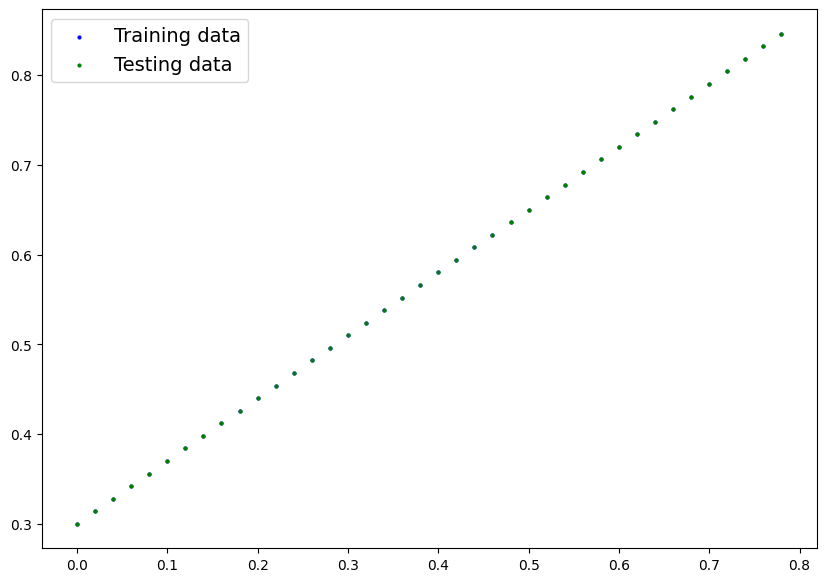

In [36]:
plot_predictions();

#**38.Creating our first Pytorch model**

In [42]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


Checking the contents of a PyTorch model

In [44]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [45]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])